# Usage Data Nasa

In [1]:
import pandas as pd
import gzip

rows = []

with gzip.open("NASA_access_log_Jul95.gz", "rt", encoding="latin-1", errors="ignore") as f:
    for line in f:
        parts = line.strip().split()
        rows.append(parts)

df = pd.DataFrame(rows)

df.to_csv("NASA_Jul95.csv", index=False)

print("File berhasil disimpan sebagai NASA_Jul95.csv")

File berhasil disimpan sebagai NASA_Jul95.csv


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],"""GET",/history/apollo/,"HTTP/1.0""",200,6245,...,None,None,None,None,None,None,None,None,None,None
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],"""GET",/shuttle/countdown/,"HTTP/1.0""",200,3985,...,None,None,None,None,None,None,None,None,None,None
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],"""GET",/shuttle/missions/sts-73/mission-sts-73.html,"HTTP/1.0""",200,4085,...,None,None,None,None,None,None,None,None,None,None
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],"""GET",/shuttle/countdown/liftoff.html,"HTTP/1.0""",304,0,...,None,None,None,None,None,None,None,None,None,None
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],"""GET",/shuttle/missions/sts-73/sts-73-patch-small.gif,"HTTP/1.0""",200,4179,...,None,None,None,None,None,None,None,None,None,None


In [3]:
import pandas as pd

# Baca CSV tanpa header
df = pd.read_csv("NASA_Jul95.csv", header=None, dtype=str, na_filter=False)

# Pastikan nama kolom 0..N-1
df.columns = range(df.shape[1])

# Hapus baris pertama yang hanya berisi angka 0 1 2 3 ...
df = df.drop(index=0).reset_index(drop=True)

# Ambil kolom 0–9
df_filtered = df.iloc[:, 0:10]

# Rename kolom sesuai permintaan
df_filtered = df_filtered.rename(columns={
    0: "Remote host",
    1: "logname",
    2: "user",
    3: "Request time",
    # kolom 4 tetap
    5: "Request method",
    6: "Request URI",
    7: "Request Protocol",
    8: "Status",
    9: "Size"
})

# Lihat hasil
df_filtered.head(10)

# Simpan ke CSV baru
df_filtered.to_csv("NASA_Jul95_filtered.csv", index=False)

print("File berhasil dibuat: NASA_Jul95_filtered.csv")

File berhasil dibuat: NASA_Jul95_filtered.csv


In [4]:
df_filtered.head(10)

,Remote host,logname,user,Request time,4,Request method,Request URI,Request Protocol,Status,Size
0,199.72.81.55,-,-,[01/Jul/1995:00:00:01,-0400],"""GET",/history/apollo/,"HTTP/1.0""",200,6245
1,unicomp6.unicomp.net,-,-,[01/Jul/1995:00:00:06,-0400],"""GET",/shuttle/countdown/,"HTTP/1.0""",200,3985
2,199.120.110.21,-,-,[01/Jul/1995:00:00:09,-0400],"""GET",/shuttle/missions/sts-73/mission-sts-73.html,"HTTP/1.0""",200,4085
3,burger.letters.com,-,-,[01/Jul/1995:00:00:11,-0400],"""GET",/shuttle/countdown/liftoff.html,"HTTP/1.0""",304,0
4,199.120.110.21,-,-,[01/Jul/1995:00:00:11,-0400],"""GET",/shuttle/missions/sts-73/sts-73-patch-small.gif,"HTTP/1.0""",200,4179
5,burger.letters.com,-,-,[01/Jul/1995:00:00:12,-0400],"""GET",/images/NASA-logosmall.gif,"HTTP/1.0""",304,0
6,burger.letters.com,-,-,[01/Jul/1995:00:00:12,-0400],"""GET",/shuttle/countdown/video/livevideo.gif,"HTTP/1.0""",200,0
7,205.212.115.106,-,-,[01/Jul/1995:00:00:12,-0400],"""GET",/shuttle/countdown/countdown.html,"HTTP/1.0""",200,3985
8,d104.aa.net,-,-,[01/Jul/1995:00:00:13,-0400],"""GET",/shuttle/countdown/,"HTTP/1.0""",200,3985
9,129.94.144.152,-,-,[01/Jul/1995:00:00:13,-0400],"""GET",/,"HTTP/1.0""",200,7074


HTML only

In [5]:
import pandas as pd

# === 1️⃣ Baca file CSV ===
file_path = "NASA_Jul95_filtered.csv"  # ubah jika file ada di lokasi lain
df = pd.read_csv(file_path)

# === 2️⃣ Pastikan kolom 'Request URI' ada ===
if 'Request URI' not in df.columns:
    raise ValueError(f"Kolom 'Request URI' tidak ditemukan. Kolom yang tersedia: {df.columns.tolist()}")

# === 3️⃣ Filter hanya baris yang memiliki .html pada kolom 'Request URI' ===
filtered_df = df[df['Request URI'].str.contains(r'\.html$', na=False, case=False)]

# === 4️⃣ Simpan hasil filter ke file baru ===
output_path = "NASA_html_only.csv"
filtered_df.to_csv(output_path, index=False)

print(f"✅ File hasil filter berhasil dibuat: {output_path}")
print(f"Jumlah data asli: {len(df)}, jumlah data .html: {len(filtered_df)}")

✅ File hasil filter berhasil dibuat: NASA_html_only.csv
Jumlah data asli: 1891715, jumlah data .html: 417952


200.html only

In [6]:
import pandas as pd

# === 1️⃣ Baca file hasil filter sebelumnya ===
file_path = "NASA_html_only.csv"  # pastikan file ini sudah ada dari langkah sebelumnya
df = pd.read_csv(file_path)

# === 2️⃣ Pastikan kolom 'Status' ada ===
if 'Status' not in df.columns:
    raise ValueError(f"Kolom 'Status' tidak ditemukan. Kolom yang tersedia: {df.columns.tolist()}")

# === 3️⃣ Filter hanya baris dengan Status = 200 ===
filtered_df = df[df['Status'] == 200]

# === 4️⃣ Simpan hasil filter ke file baru ===
output_path = "NASA_html_status200.csv"
filtered_df.to_csv(output_path, index=False)

print(f"✅ File hasil filter status 200 berhasil dibuat: {output_path}")
print(f"Jumlah data asli: {len(df)}, jumlah data status 200: {len(filtered_df)}")

C:\Users\NITRO\AppData\Local\Temp\ipykernel_31780\623428601.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ File hasil filter status 200 berhasil dibuat: NASA_html_status200.csv
Jumlah data asli: 417952, jumlah data status 200: 62435


Request Method

In [7]:
import pandas as pd

# === 1️⃣ Baca file hasil sebelumnya ===
file_path = "NASA_html_status200.csv"
df = pd.read_csv(file_path)

# === 2️⃣ Pastikan kolom 'Request method' ada ===
if 'Request method' not in df.columns:
    raise ValueError(f"Kolom 'Request method' tidak ditemukan. Kolom yang tersedia: {df.columns.tolist()}")

# === 3️⃣ Filter hanya baris dengan Request method = 'GET' ===
filtered_df = df[df['Request method'].str.upper() == '"GET']

# === 4️⃣ Simpan hasil filter ke file baru ===
output_path = "NASA_html_status200_get.csv"
filtered_df.to_csv(output_path, index=False)

print(f"✅ File hasil filter GET berhasil dibuat: {output_path}")
print(f"Jumlah data asli: {len(df)}, jumlah data GET: {len(filtered_df)}")
print("Contoh 5 baris pertama hasil filter:")
filtered_df.head()

✅ File hasil filter GET berhasil dibuat: NASA_html_status200_get.csv
Jumlah data asli: 62435, jumlah data GET: 62265
Contoh 5 baris pertama hasil filter:


,Remote host,logname,user,Request time,4,Request method,Request URI,Request Protocol,Status,Size
0,hplb.hpl.hp.com,-,-,[05/Jul/1995:03:49:50,-0400],"""GET",/shuttle/missions/sts-71/movies/movies.html,"HTTP/1.0""",200,3089
1,10forward.ppp.america.com,-,-,[05/Jul/1995:03:49:57,-0400],"""GET",/history/apollo/apollo-13/apollo-13.html,"HTTP/1.0""",200,18114
2,pc111.twi.ch,-,-,[05/Jul/1995:03:50:07,-0400],"""GET",/history/history.html,"HTTP/1.0""",200,1502
3,aqua1e.cfi.waseda.ac.jp,-,-,[05/Jul/1995:03:50:11,-0400],"""GET",/mdss/MDSS.html,"HTTP/1.0""",200,2727
4,132.146.65.211,-,-,[05/Jul/1995:03:50:12,-0400],"""GET",/ksc.html,"HTTP/1.0""",200,7074


Request Time

Mengubah Format Request Time yang awalnya 05/Jul/1995:03:49:50 menjadi format seperti ini 2009-10-15 02:00:24

In [8]:
import pandas as pd

# === 1. Baca file GET ===
df = pd.read_csv("NASA_html_status200_get.csv", dtype=str)

# Pastikan kolom 'Request time' ada
if "Request time" not in df.columns:
    raise ValueError("Kolom 'Request time' tidak ditemukan!")

# === 2. Bersihkan format time ===
# Hilangkan karakter '[', ']' jika masih ada
df["Request time"] = df["Request time"].str.replace("[", "", regex=False)
df["Request time"] = df["Request time"].str.replace("]", "", regex=False)

# === 3. Convert ke datetime ===
# Format asli: 05/Jul/1995:03:49:50
df["Request time"] = pd.to_datetime(
    df["Request time"],
    format="%d/%b/%Y:%H:%M:%S",
    errors="coerce"   # jika gagal parse → NaT
)

# === 4. Ubah format output menjadi yyyy-mm-dd HH:MM:SS ===
df["Request time"] = df["Request time"].dt.strftime("%Y-%m-%d %H:%M:%S")

# === 5. Simpan ulang ===
output_path = "NASA_html_status200_get_converted.csv"
df.to_csv(output_path, index=False)

print(f"Format Request time berhasil diubah dan disimpan sebagai: {output_path}")
print(df.head())

Format Request time berhasil diubah dan disimpan sebagai: NASA_html_status200_get_converted.csv
                 Remote host logname user         Request time       4  \
0            hplb.hpl.hp.com       -    -  1995-07-05 03:49:50  -0400]   
1  10forward.ppp.america.com       -    -  1995-07-05 03:49:57  -0400]   
2               pc111.twi.ch       -    -  1995-07-05 03:50:07  -0400]   
3    aqua1e.cfi.waseda.ac.jp       -    -  1995-07-05 03:50:11  -0400]   
4             132.146.65.211       -    -  1995-07-05 03:50:12  -0400]   

  Request method                                  Request URI  \
0           "GET  /shuttle/missions/sts-71/movies/movies.html   
1           "GET     /history/apollo/apollo-13/apollo-13.html   
2           "GET                        /history/history.html   
3           "GET                              /mdss/MDSS.html   
4           "GET                                    /ksc.html   

  Request Protocol Status   Size  
0        HTTP/1.0"    200   3089 

Filter Berdasarkan IP Address(Remote host) dan User Agent(Request Protocol)

In [9]:
# Pastikan copy dataframe dulu (optional)
df = df.copy()

# Buat kolom user_id berdasarkan kombinasi Remote host + Request Protocol
df['user_id'] = df.groupby(['Remote host', 'Request Protocol']).ngroup() + 1

print(f"Total unique user ID: {df['user_id'].nunique()}")

Total unique user ID: 15481


In [10]:
import pandas as pd

df = pd.read_csv("NASA_html_status200_get_converted.csv", dtype=str)

# Buat user_id berdasarkan Remote host + Request Protocol
df["user_id"] = df.groupby(["Remote host", "Request Protocol"]).ngroup() + 1

print(f"Total unique user ID: {df['user_id'].nunique()}")

# Pilih dan urutkan kolom sesuai permintaan
result = df[
    [
        "Remote host",
        "Request Protocol",
        "Request time",
        "user_id",
        "Request URI",
        "Status",
    ]
]

output_path = "NASA_html_status200_get_final.csv"
result.to_csv(output_path, index=False)

print(f"File CSV final berhasil dibuat: {output_path}")

Total unique user ID: 15481
File CSV final berhasil dibuat: NASA_html_status200_get_final.csv


In [11]:
result.head(10)

,Remote host,Request Protocol,Request time,user_id,Request URI,Status
0,hplb.hpl.hp.com,"HTTP/1.0""",1995-07-05 03:49:50,8254,/shuttle/missions/sts-71/movies/movies.html,200
1,10forward.ppp.america.com,"HTTP/1.0""",1995-07-05 03:49:57,10,/history/apollo/apollo-13/apollo-13.html,200
2,pc111.twi.ch,"HTTP/1.0""",1995-07-05 03:50:07,11610,/history/history.html,200
3,aqua1e.cfi.waseda.ac.jp,"HTTP/1.0""",1995-07-05 03:50:11,4534,/mdss/MDSS.html,200
4,132.146.65.211,"HTTP/1.0""",1995-07-05 03:50:12,823,/ksc.html,200
5,ppp-s22.pinsight.com,"HTTP/1.0""",1995-07-05 03:50:20,12341,/history/apollo/apollo.html,200
6,metz.une.edu.au,"HTTP/1.0""",1995-07-05 03:50:24,10378,/history/apollo/apollo-17/apollo-17-info.html,200
7,132.146.65.211,"HTTP/1.0""",1995-07-05 03:50:25,823,/facts/about_ksc.html,200
8,ppp-s22.pinsight.com,"HTTP/1.0""",1995-07-05 03:50:39,12341,/history/apollo/apollo-1/apollo-1.html,200
9,10forward.ppp.america.com,"HTTP/1.0""",1995-07-05 03:50:52,10,/facilities/lc39a.html,200


Mengurutkan Remote Host

In [12]:
import pandas as pd

# Baca file final sebelumnya
df = pd.read_csv("NASA_html_status200_get_final.csv", dtype=str)

# Pastikan Request time dalam datetime agar sorting benar
df["Request time"] = pd.to_datetime(df["Request time"], errors="coerce")

# Sorting: Remote host A-Z, lalu waktu dari yang paling awal
df_sorted = df.sort_values(by=["Remote host", "Request time"], ascending=[True, True])

# Simpan ke file baru
output_path = "NASA_html_status200_get_sorted.csv"
df_sorted.to_csv(output_path, index=False)

print(f"File sorted berhasil dibuat: {output_path}")
print(df_sorted.head(20))

File sorted berhasil dibuat: NASA_html_status200_get_sorted.csv
                           Remote host Request Protocol        Request time  \
33253                   007.thegap.com        HTTP/1.0" 1995-07-06 17:24:28   
33289                   007.thegap.com        HTTP/1.0" 1995-07-06 17:26:24   
33338                   007.thegap.com        HTTP/1.0" 1995-07-06 17:28:35   
33548                   007.thegap.com        HTTP/1.0" 1995-07-06 17:37:44   
35309                   007.thegap.com        HTTP/1.0" 1995-07-06 19:23:26   
35352                   007.thegap.com        HTTP/1.0" 1995-07-06 19:26:24   
35480                   007.thegap.com        HTTP/1.0" 1995-07-06 19:34:36   
1465   01-dynamic-c.wokingham.luna.net        HTTP/1.0" 1995-07-05 07:36:59   
42250  02-dynamic-c.wokingham.luna.net        HTTP/1.0" 1995-07-07 07:59:10   
607    05-dynamic-c.rotterdam.luna.net        HTTP/1.0" 1995-07-05 05:37:35   
612    05-dynamic-c.rotterdam.luna.net        HTTP/1.0" 1995-07-05 

Sesi tiap 35 menit

In [13]:
import pandas as pd

# Baca file sorted
df = pd.read_csv("NASA_html_status200_get_sorted.csv", dtype=str)

# Konversi kolom waktu
df["Request time"] = pd.to_datetime(df["Request time"], errors="coerce")

# Sort ulang untuk memastikan benar (Host + Time)
df = df.sort_values(by=["Remote host", "Request time"]).reset_index(drop=True)

# Buat kolom session
df["session"] = 0

# Durasi timeout session = 35 menit
session_timeout = pd.Timedelta(minutes=35)

# Loop per host
for host, group in df.groupby("Remote host").groups.items():

    indices = df.loc[group].index.tolist()  # indeks baris untuk host ini
    current_session = 1                     # mulai dari sesi 1

    df.at[indices[0], "session"] = current_session

    for i in range(1, len(indices)):
        prev_time = df.loc[indices[i - 1], "Request time"]
        curr_time = df.loc[indices[i], "Request time"]

        # Jika selisih waktu lebih dari 35 menit → session baru
        if curr_time - prev_time > session_timeout:
            current_session += 1

        df.at[indices[i], "session"] = current_session

# Simpan ke CSV baru
output_path = "NASA_html_status200_with_session.csv"
df.to_csv(output_path, index=False)

print(f"✔ Session berhasil dihitung dan file disimpan ke: {output_path}")
print(df.head(20))

✔ Session berhasil dihitung dan file disimpan ke: NASA_html_status200_with_session.csv
                        Remote host Request Protocol        Request time  \
0                    007.thegap.com        HTTP/1.0" 1995-07-06 17:24:28   
1                    007.thegap.com        HTTP/1.0" 1995-07-06 17:26:24   
2                    007.thegap.com        HTTP/1.0" 1995-07-06 17:28:35   
3                    007.thegap.com        HTTP/1.0" 1995-07-06 17:37:44   
4                    007.thegap.com        HTTP/1.0" 1995-07-06 19:23:26   
5                    007.thegap.com        HTTP/1.0" 1995-07-06 19:26:24   
6                    007.thegap.com        HTTP/1.0" 1995-07-06 19:34:36   
7   01-dynamic-c.wokingham.luna.net        HTTP/1.0" 1995-07-05 07:36:59   
8   02-dynamic-c.wokingham.luna.net        HTTP/1.0" 1995-07-07 07:59:10   
9   05-dynamic-c.rotterdam.luna.net        HTTP/1.0" 1995-07-05 05:37:35   
10  05-dynamic-c.rotterdam.luna.net        HTTP/1.0" 1995-07-05 05:38:42   
1

In [14]:
df.head()

,Remote host,Request Protocol,Request time,user_id,Request URI,Status,session
0,007.thegap.com,"HTTP/1.0""",1995-07-06 17:24:28,1,/shuttle/missions/sts-71/mission-sts-71.html,200,1
1,007.thegap.com,"HTTP/1.0""",1995-07-06 17:26:24,1,/shuttle/missions/sts-71/sts-71-day-09-highlig...,200,1
2,007.thegap.com,"HTTP/1.0""",1995-07-06 17:28:35,1,/shuttle/missions/sts-71/mission-sts-71.html,200,1
3,007.thegap.com,"HTTP/1.0""",1995-07-06 17:37:44,1,/shuttle/missions/sts-71/images/images.html,200,1
4,007.thegap.com,"HTTP/1.0""",1995-07-06 19:23:26,1,/shuttle/countdown/tour.html,200,2


Matrix sesi

In [15]:
from scipy.sparse import coo_matrix
import pandas as pd

def create_matrix(df_sessionized):
    """
    Membuat matriks Sesi x Halaman dari data yang sudah disesikan.
    Satu baris = satu sesi (user), satu kolom = halaman (Request URI).
    Nilai 1 = halaman dikunjungi dalam sesi tersebut.
    """

    if df_sessionized is None:
        return None

    print("\nMembuat matriks Sesi x Halaman ...")

    # Perbaikan: gunakan kolom yang benar
    session_info = (
        df_sessionized[['session', 'Remote host']]
        .drop_duplicates()
        .sort_values(by=['session', 'Remote host'])
        .reset_index(drop=True)
    )

    # Membuat key unik antar sesi
    session_info['Session_Key'] = (
        session_info['session'].astype(str) + '_' + session_info['Remote host']
    )

    # Ambil semua URI unik
    unique_uris = df_sessionized['Request URI'].unique()

    # Mapping SessionKey dan URI ke index
    session_key_to_idx = {
        key: i for i, key in enumerate(session_info['Session_Key'])
    }
    uri_to_idx = {uri: i for i, uri in enumerate(unique_uris)}

    # Mapping baris dataframe ke index
    df_temp = df_sessionized.copy()
    df_temp['Session_Key'] = (
        df_temp['session'].astype(str) + '_' + df_temp['Remote host']
    )

    rows = df_temp['Session_Key'].map(session_key_to_idx).to_numpy()
    cols = df_temp['Request URI'].map(uri_to_idx).to_numpy()
    data = [1] * len(df_temp)   # nilai matriks = 1

    # Membuat sparse matrix COO
    sparse_matrix = coo_matrix(
        (data, (rows, cols)),
        shape=(len(session_info), len(unique_uris))
    ).tocsr()

    # Convert ke DataFrame biasa
    final_output = pd.DataFrame(
        sparse_matrix.toarray(),
        index=session_info['Session_Key'],
        columns=unique_uris
    )

    final_output = (final_output > 0).astype(int)

    # Reset index untuk memecah SessionID dan IP
    final_output = final_output.reset_index()
    final_output[['session', 'Remote host']] = \
        final_output['Session_Key'].str.split('_', n=1, expand=True)

    final_output = final_output.drop(columns=['Session_Key'])

    # Menempatkan Remote host di awal kolom
    cols_order = ['session', 'Remote host'] + \
                 [c for c in final_output.columns if c not in ['session', 'Remote host']]
    final_output = final_output[cols_order]

    # Simpan ke CSV
    try:
        final_output.to_csv('hasil_matriks_sesiNASA.csv', index=False)
        print("\n✔ Matriks berhasil disimpan menjadi: hasil_matriks_sesiNASA.csv")
    except Exception as e:
        print("\nGagal menyimpan file:", e)

    return final_output

In [16]:
df_session = pd.read_csv("NASA_html_status200_with_session.csv")

final_matrix = create_matrix(df_session)

display(final_matrix)


Membuat matriks Sesi x Halaman ...

✔ Matriks berhasil disimpan menjadi: hasil_matriks_sesiNASA.csv


,session,Remote host,/shuttle/missions/sts-71/mission-sts-71.html,/shuttle/missions/sts-71/sts-71-day-09-highlights.html,/shuttle/missions/sts-71/images/images.html,/shuttle/countdown/tour.html,/facilities/mila.html,/shuttle/technology/sts-newsref/sts-jsc.html,/shuttle/missions/sts-71/movies/movies.html,/shuttle/missions/sts-68/ksc-srl-image.html,...,/statistics/1994/Oct/Oct94_reverse_domains.html,/shuttle/missions/sts-39/sts-39-info.html,/shuttle/missions/41-b/41-b-info.html,/shuttle/missions/sts-47/sts-47-info.html,/shuttle/missions/61-c/61-c-info.html,/shuttle/missions/sts-33/sts-33-info.html,/msfc/visitor/visitors.html,/shuttle/missions/sts-2/sts-2-info.html,/shuttle/missions/sts-3/sts-3-info.html,/shuttle/missions/sts-5/sts-5-info.html
0,1,007.thegap.com,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,01-dynamic-c.wokingham.luna.net,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,02-dynamic-c.wokingham.luna.net,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,05-dynamic-c.rotterdam.luna.net,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,08-dynamic-c.rotterdam.luna.net,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,37,www-b6.proxy.aol.com,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21411,37,www-d1.proxy.aol.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21412,38,www-b6.proxy.aol.com,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21413,38,www-d1.proxy.aol.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Hitung jumlah halaman untuk setiap sesi

In [17]:
# Hitung jumlah kunjungan tiap halaman dalam setiap sesi
page_count_per_session = (
    df_session.groupby(['session', 'Request URI'])
              .size()
              .reset_index(name='page-view')
)

display(page_count_per_session)

,session,Request URI,page-view
0,1,//ksc.html,1
1,1,//shuttle/missions/missions.html,1
2,1,/base-ops/procurement/procurement.html,3
3,1,/biomed/bibliography/biblio.html,2
4,1,/biomed/climate/airqual.html,1
...,...,...,...
3985,38,/shuttle/missions/sts-71/images/images.html,1
3986,38,/shuttle/missions/sts-9/mission-sts-9.html,1
3987,38,/statistics/1995/Jun/Jun95.html,1
3988,38,/statistics/statistics.html,1


Identifikasi Halaman Dominan per Sesi

Subtask:
Berdasarkan jumlah kunjungan, tentukan URI mana yang paling dominan (paling sering dikunjungi) untuk setiap sesi. Jika ada lebih dari satu URI dengan jumlah kunjungan tertinggi, ambil yang pertama ditemui.

In [18]:
# 1. Hitung jumlah kunjungan tiap URI dalam setiap sesi
page_count_per_session = (
    df_session.groupby(['session', 'Request URI'])
              .size()
              .reset_index(name='dominance-count')
)

# 2. Untuk setiap sesi, ambil URI dengan jumlah kunjungan tertinggi
dominant_page_per_session = (
    page_count_per_session.sort_values(['session', 'dominance-count'], ascending=[True, False])
                           .drop_duplicates(subset='session', keep='first')
                           .reset_index(drop=True)
)

display(dominant_page_per_session)

,session,Request URI,dominance-count
0,1,/shuttle/missions/sts-71/images/images.html,3947
1,2,/ksc.html,882
2,3,/ksc.html,454
3,4,/ksc.html,324
4,5,/ksc.html,215
5,6,/ksc.html,133
6,7,/ksc.html,109
7,8,/ksc.html,76
8,9,/ksc.html,60
9,10,/ksc.html,53


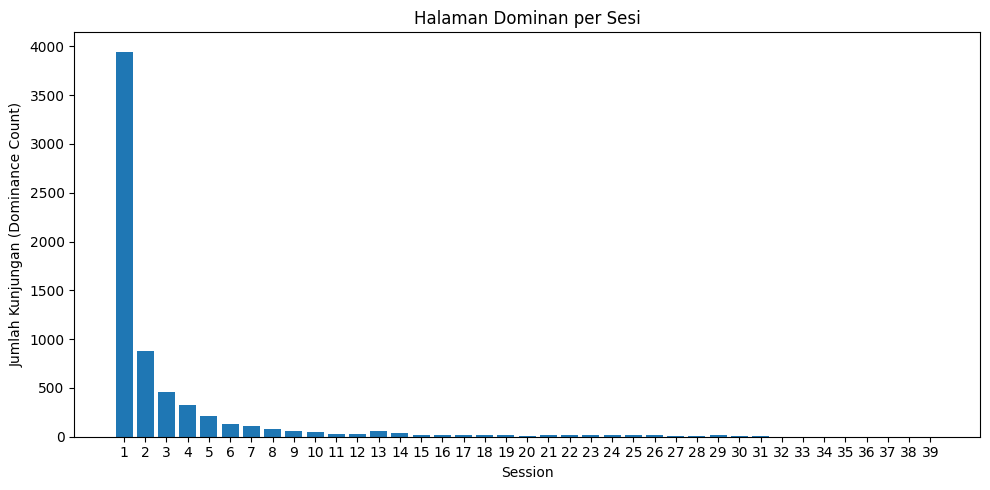

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Gunakan dataframe hasilmu sendiri di sini ---
# dominant_page_per_session = your_dataframe_here

# Contoh struktur dataframe:
# dominant_page_per_session:
#   session | Request URI | dominance-count

# --- Plot Diagram Batang Halaman Dominan per Sesi ---

plt.figure(figsize=(10, 5))
plt.bar(
    dominant_page_per_session["session"],
    dominant_page_per_session["dominance-count"]
)
plt.xlabel("Session")
plt.ylabel("Jumlah Kunjungan (Dominance Count)")
plt.title("Halaman Dominan per Sesi")
plt.xticks(dominant_page_per_session["session"])
plt.tight_layout()
plt.show()